In [1]:
import numpy as np

import argparse, cv2, os, sys, math, random

from pathlib import *

from matplotlib import pyplot as plt

from PIL import Image

from scipy import ndimage

# p4, p4m, p4g

In [2]:
# general function: 


def rec_crop(image,width,height): # crop a rectangular area 
    h,w = image.shape[:2]
    x=int(np.random.rand(1)*(w-width))
    y=int(np.random.rand(1)*(h-height))
    img_cropped = np.copy(image[y:y+height, x:x+width])
    return img_cropped

def translate_normal(image, W, H):
    (h,w)=image.shape[:2]
    times_H = int(H/h)+1
    times_W = int(W/w)+1  
    p1=image
    for j in range(1,times_H):
        p1=np.concatenate((p1,image))       
    p2=p1   
    for i in range(1,times_W):
        p2=np.concatenate((p2, p1),axis=1)   
    img_trans = p2[:H, :W] 
    return img_trans

# Specfic function:

In [3]:
# p4:
def p4_unit(img):  
    p1 = np.copy(img)
    p2 = np.rot90(p1)
    p3 = np.hstack((p1,p2))
    p4 = np.rot90(p3,2)
    img_unit = np.vstack((p4,p3))
    return img_unit

def p4(image, side_length, Width, Height): # only input side_length
    crop_rec = rec_crop(image, side_length, side_length)
    unit = p4_unit(crop_rec)
    img_p4 = translate_normal(unit, Width, Height)
    return img_p4

In [4]:
# p4m:
def p4m_unit(img):
    squ = np.copy(img)
    h,w = squ.shape[:2]
    for i in range (0,h):
        squ[i,0:int(w-i*w/h),:] = 0
    s1 = np.rot90(squ)
    s2 = cv2.flip(s1,1,dst=None)
    s3 = np.roll(s2,1,axis=1)
    s4 = np.roll(s2,-1,axis=1)
    for i in range (0,h):  # from here
        for j in range (0,w):
            if np.sum(squ[i,j,:])==0:
                squ[i,j,:]=np.copy(s2[i,j,:])
            if np.sum(squ[i,j,:])==0:
                squ[i,j,:]=np.copy(s3[i,j,:])
            if np.sum(squ[i,j,:])==0:
                squ[i,j,:]=np.copy(s4[i,j,:])    
    if np.sum(squ[h-1,w-1,:])==0:
        squ[h-1,w-1,:]= np.copy(squ[h-2,w-2,:])
    if np.sum(squ[h-1,0,:])==0:
        squ[h-1,0,:]= np.copy(squ[h-2,0,:])
    if np.sum(squ[h-1,w-1,:])==0:
        squ[0,w-1,:]= np.copy(squ[0,w-2,:])
    if np.sum(squ[h-1,w-1,:])==0:
        squ[0,0,:]= np.copy(squ[1,1,:])  # to here, need to be shorten
        
    s3 = cv2.flip(squ,1,dst=None)
    s4 = np.hstack((squ,s3))
    s5 = cv2.flip(s4,0,dst=None)
    s6 = np.vstack((s5,s4))
    return s6

def p4m(image,side_length,Width,Height):
    crop_rec = rec_crop(image, side_length, side_length)
    unit = p4m_unit(crop_rec)
    img_p4m = translate_normal(unit, Width, Height)   
    return img_p4m

In [5]:
# p4g:
def p4g_unit(img):
    squ = np.copy(img)
    h,w = squ.shape[:2]
    for i in range (0,h):
        squ[i,0:int(w-i*w/h),:] = 0
    s1 = np.rot90(squ)
    s2 = cv2.flip(s1,1,dst=None)
    s3 = np.roll(s2,1,axis=1)
    s4 = np.roll(np.roll(s2,-1,axis=1),-1,axis=0)

    for i in range (0,h):
        for j in range (0,w):
            if np.sum(squ[i,j,:])==0:
                squ[i,j,:]=np.copy(s2[i,j,:])
            if np.sum(squ[i,j,:])==0:
                squ[i,j,:]=np.copy(s3[i,j,:])
    if np.sum(squ[h-1,w-1,:])==0:
        squ[h-1,w-1,:]= np.copy(squ[h-2,w-2,:])
    if np.sum(squ[h-1,0,:])==0:
        squ[h-1,0,:]= np.copy(squ[h-2,0,:])
    if np.sum(squ[h-1,w-1,:])==0:
        squ[0,w-1,:]= np.copy(squ[0,w-2,:])
    if np.sum(squ[h-1,w-1,:])==0:
        squ[0,0,:]= np.copy(squ[1,1,:])
    p1 = np.copy(squ)
    p2 = np.rot90(p1,3)
    p12 = np.hstack((p1,p2))
    p34 = np.rot90(p12,2)
    unit = np.vstack((p12,p34))
    
    return unit

def p4g(image, side_length, Width, Height):
    crop_rec = rec_crop(image, side_length, side_length)
    unit = p4g_unit(crop_rec)
    img_p4g = translate_normal(unit, Width, Height)
    return img_p4g

# Validate with image sample

In [6]:
import cv2, math, os, random
import numpy as np
import matplotlib.pyplot as plt

# Load image

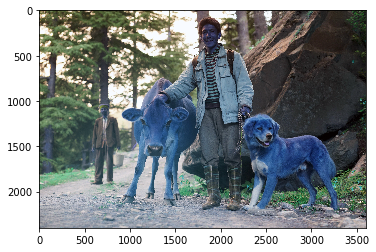

In [7]:
# use image samples for demontration
ori = cv2.imread('/home/yig319/Dropbox/wallpaper_group_generator/Original_images/dog-park.png') 
image1 = np.copy(ori) # load image used to crop and transform
imgplot = plt.imshow(image1)

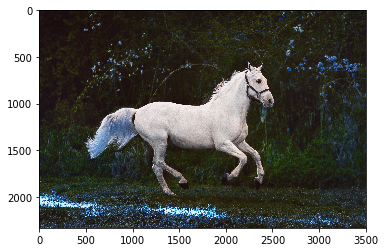

In [8]:
# use image samples for demontration
ori = cv2.imread('/home/yig319/Dropbox/wallpaper_group_generator/Original_images/horse.png') 
image2 = np.copy(ori) # load image used to crop and transform
imgplot = plt.imshow(image2)

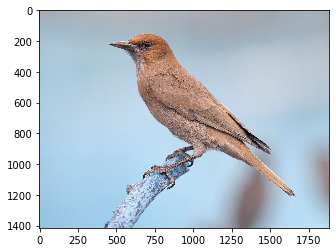

In [9]:
# use image samples for demontration
ori = cv2.imread('/home/yig319/Dropbox/wallpaper_group_generator/Original_images/bird.png') 
image3 = np.copy(ori) # load image used to crop and transform
imgplot = plt.imshow(image3)

# Set image size

In [10]:
#set output image size 
width, height = (256, 256)

# use random size and angle as croped part of image
angle = random.randint(30,85)
unit_h = random.randint(20,80)
lower_bound_w = int(unit_h/math.tan(math.radians(angle)))
if lower_bound_w > 65:
    unit_w = random.randint(lower_bound_w+15, lower_bound_w+75)
else: 
    unit_w = random.randint(lower_bound_w+15, 85)
    
# width, length, angle of unit cell:
unit_w, unit_h, angle

(83, 29, 48)

# Transform

In [11]:
p4_1 = p4(image1,unit_w,width,height)

p4m_1 = p4m(image1,unit_w,width,height) 

p4g_1 = p4g(image1,unit_w,width,height)

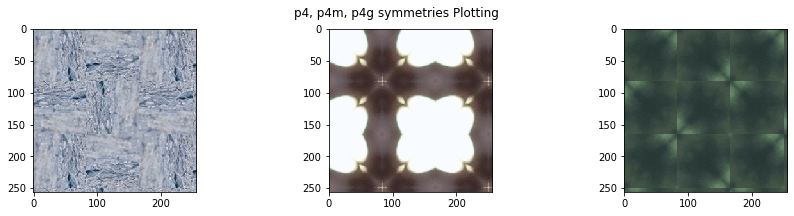

In [12]:
plt.figure(figsize=(15, 3))
plt.subplot(131)
plt.imshow(p4_1)
plt.subplot(132)
plt.imshow(p4m_1)
plt.subplot(133)
plt.imshow(p4g_1)

plt.suptitle('p4, p4m, p4g symmetries Plotting')
plt.show()

In [13]:
p4_1 = p4(image2,unit_w,width,height)

p4m_1 = p4m(image2,unit_w,width,height) 

p4g_1 = p4g(image2,unit_w,width,height)

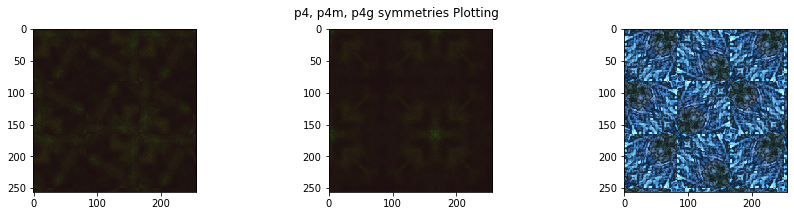

In [14]:
plt.figure(figsize=(15, 3))
plt.subplot(131)
plt.imshow(p4_1)
plt.subplot(132)
plt.imshow(p4m_1)
plt.subplot(133)
plt.imshow(p4g_1)

plt.suptitle('p4, p4m, p4g symmetries Plotting')
plt.show()

In [15]:
p4_1 = p4(image3,unit_w,width,height)

p4m_1 = p4m(image3,unit_w,width,height) 

p4g_1 = p4g(image3,unit_w,width,height)

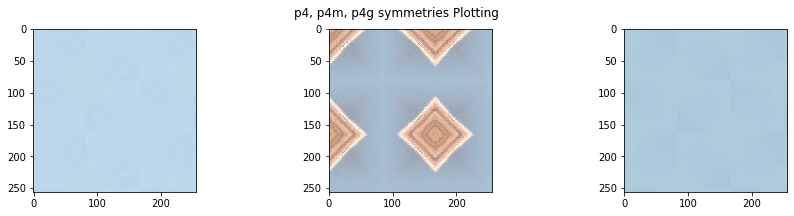

In [16]:
plt.figure(figsize=(15, 3))
plt.subplot(131)
plt.imshow(p4_1)
plt.subplot(132)
plt.imshow(p4m_1)
plt.subplot(133)
plt.imshow(p4g_1)

plt.suptitle('p4, p4m, p4g symmetries Plotting')
plt.show()